In [ ]:
# !sudo apt install tesseract-ocr
# !sudo apt install libtesseract-dev

In [ ]:

# !pip install transformers
# !pip install torch
# !pip install pillow
# !pip install requests
# !pip install pytesseract opencv-python pillow

In [ ]:
# import cv2
# import pytesseract
# from PIL import Image

# # Path to the tesseract executable
# # On Windows, you might need to specify the Tesseract path
# # For example: pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# # Function to preprocess the image
# def preprocess_image(image_path):
#     # Load image
#     img = cv2.imread(image_path)

#     # Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Apply thresholding to enhance image contrast
#     # _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
#     thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

#     return thresh

# # Function to perform OCR on the image
# def extract_text_from_image(image_path):
#     # Preprocess the image
#     processed_image = preprocess_image(image_path)

#     # Save the preprocessed image for checking (optional)
#     cv2.imwrite('processed_image.png', processed_image)

#     # Use pytesseract to extract text
#     text = pytesseract.image_to_string(processed_image)

#     return text

# # Path to your bill image
# image_path = '/content/bill3.jpg'

# # Extract text from the image
# extracted_text = extract_text_from_image(image_path)

# # Print the extracted text
# print("Extracted Text:\n", extracted_text)

In [ ]:
# !pip install easyocr
# !pip install cohere

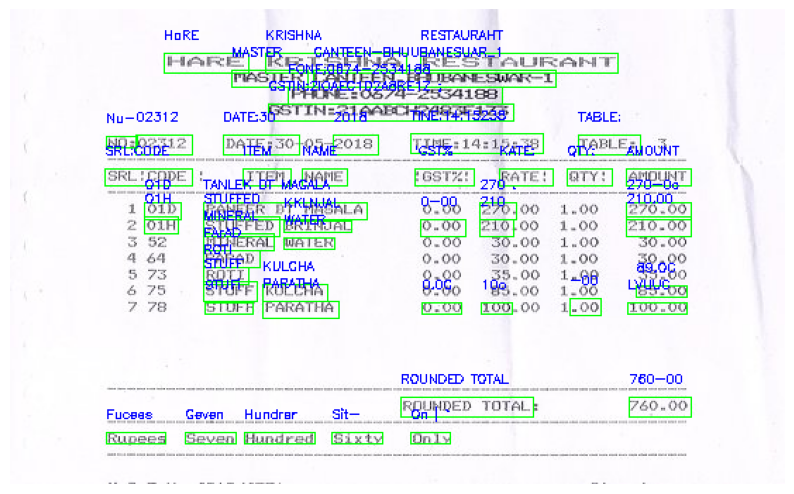

Text: HaRE, Bounding Box: [[109, 31], [169, 31], [169, 45], [109, 45]], Confidence: 0.31
Text: KRISHNA, Bounding Box: [[181, 31], [281, 31], [281, 45], [181, 45]], Confidence: 0.94
Text: RESTAURAHT, Bounding Box: [[291, 31], [431, 31], [431, 45], [291, 45]], Confidence: 0.95
Text: MASTER, Bounding Box: [[157, 43], [211, 43], [211, 55], [157, 55]], Confidence: 0.63
Text: CANTEEN-BHUUBANESUAR_1, Bounding Box: [[215, 43], [387, 43], [387, 55], [215, 55]], Confidence: 0.17
Text: FONE:0674-2534188, Bounding Box: [[197, 55], [349, 55], [349, 67], [197, 67]], Confidence: 0.41
Text: GSTIN:2IOAEC1D2A8RE1Z ;, Bounding Box: [[183, 67], [357, 67], [357, 79], [183, 79]], Confidence: 0.03
Text: Nu-, Bounding Box: [[68, 90], [90, 90], [90, 98], [68, 98]], Confidence: 0.10
Text: 02312, Bounding Box: [[89, 89], [129, 89], [129, 103], [89, 103]], Confidence: 0.94
Text: DATE:30, Bounding Box: [[151, 89], [205, 89], [205, 103], [151, 103]], Confidence: 0.57
Text: 2018, Bounding Box: [[229, 89], [261, 89],

In [2]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_path = '../images/bill3.jpg'
image = cv2.imread(image_path)

# Initialize the EasyOCR reader for the English language (add more languages if needed)
reader = easyocr.Reader(['en'])

# Perform OCR on the image
results = reader.readtext(image_path)

# result is a list of tuples
# ([Top-left corner, Top-right corner, Bottom-right corner, Bottom-left corner], text, probability)

# Loop over the results
for (bbox, text, prob) in results:
    # Extract the bounding box (4 points), text, and probability
    top_left = tuple([int(val) for val in bbox[0]])
    bottom_right = tuple([int(val) for val in bbox[2]])

    # Draw the bounding box on the image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 1)  # Green box

    # Put the recognized text on the image (optional)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)  # Blue text

# Convert BGR image (from OpenCV) to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

texto = ""

# Output text and bounding boxes
for (bbox, text, prob) in results:
    print(f"Text: {text}, Bounding Box: {bbox}, Confidence: {prob:.2f}")
    texto+=text

In [3]:
cv2.imwrite("output.png", image_rgb)

True

In [6]:
import cohere
import os
from dotenv import load_dotenv

# Load the .env file
load_dotenv()

# Get the API key from environment variables
api_key = os.getenv('API_KEY')
co = cohere.ClientV2(api_key)

response = co.chat(
    model="command-r-plus-08-2024",
    messages=[
        {
            "role": "user",
            "content": f"The following is the output of an OCR model on a bill, {texto}, Provide a json with final amount, category, heading and date of the bill. Add None if information is insufficient"
        }
    ]
)


In [7]:
print(response.message.content[0].text)

{
  "final_amount": "760.00",
  "category": "Food and Beverage",
  "heading": "Hare Krishna Restaurant and Master Canteen",
  "date": "30/08/2018"
}
